In [1]:
#importando bibliotecas python.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lendo o arquivo 'train' do titanic.

df = pd.read_csv('https://raw.githubusercontent.com/fthara/titanicKaggle/master/dataSets/train.csv')

In [3]:
#Imprimir as 5 primeiras linhas do dataset.

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Verificar o tamanho do dataset.

df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Verificar quantos 'NaN'existem na coluna 'Cabin'.

len(df['Cabin'].loc[df['Cabin'].isna()==True])

687

In [7]:
#Foi verificado que existem muitos 'NaN'na coluna 'Cabin', o que não ajuda na predição, portanto a coluna
#será descartada do dataset.

df.drop('Cabin', inplace=True, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
#Verificando quantos valores nulos/vazios existem no dataset.

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
#Foi verificado que existem 177 valores nulos de 'Age'. Filtrando os valores nulos de 'Age''

df.loc[df['Age'].isnull()==True].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [10]:
# Tratativa: verificar a média da idade dos passageiros, de acordo com título (mr, mrs, miss, etc..)
#dado a eles no nome e lançar aos valores nulos.

#Separando o primero nome do ultimo nome.
# new data frame with split value columns 
new = df["Name"].str.split(",", n = 1, expand = True) 

#Adicionando as novas colunas ao dataframe
# making separate first name column from new data frame 
df["FirstName"]= new[0] 
  
# making separate last name column from new data frame 
df["LastName"]= new[1]
  
# df display 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,Mr. William Henry


In [11]:
#df.drop(columns=['First Name', 'Last Name', 'FirstName', 'LastName'], inplace=True)

In [12]:
#Fazendo o mesmo processo para separar os nomes pelo pronome de tratamento.

# new data frame with split value columns 
new = df["LastName"].str.split(".", n = 1, expand = True) 

#Adicionando as novas colunas ao dataframe
# making separate first name column from new data frame 
df["treatmentPronoun"]= new[0] 
  
# making separate last name column from new data frame 
df["LastName"]= new[1]
  
# df display 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName,LastName,treatmentPronoun
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Jacques Heath (Lily May Peel),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,William Henry,Mr


In [13]:
#As strings da coluna 'treatmentPronoun'estão com um espaço em branco na frente. Vamos retirá-los.

df['treatmentPronoun']=df['treatmentPronoun'].str.strip()

In [14]:
#Qual é a quantidade de cada pronome de tratamento?

df.treatmentPronoun.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
the Countess      1
Capt              1
Jonkheer          1
Lady              1
Don               1
Sir               1
Mme               1
Name: treatmentPronoun, dtype: int64

In [15]:
#Qual o número de cada pronome de tratamento com 'Age' igual a 'NaN'?

df.loc[df['Age'].isnull()==True].treatmentPronoun.value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: treatmentPronoun, dtype: int64

In [16]:
#Qual a média de idade por pronome de tratamento das idades diferentes de NaN.

mediaIdade = df.loc[df['Age'].isnull()==False]
mediaIdade = mediaIdade.groupby('treatmentPronoun')['Age'].mean().round()
print(mediaIdade)

treatmentPronoun
Capt            70.0
Col             58.0
Don             40.0
Dr              42.0
Jonkheer        38.0
Lady            48.0
Major           48.0
Master           5.0
Miss            22.0
Mlle            24.0
Mme             24.0
Mr              32.0
Mrs             36.0
Ms              28.0
Rev             43.0
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64


In [17]:
#Adicionando a idade média nos campos com idade igual a 'NaN'

def addIdade(columnTP):
    if columnTP == 'Mr':
        return 32
    elif columnTP == 'Miss':
        return 22
    elif columnTP == 'Mrs':
        return 36
    elif columnTP == 'Master':
        return 5
    else:
        return 42
    
df.loc[df['Age'].isna()==True, 'Age'] = df.loc[df['Age'].isna()==True].apply(lambda x: addIdade(x.treatmentPronoun), axis=1)
df.Age.isna().value_counts()

False    891
Name: Age, dtype: int64

In [18]:
#imprimindo o novo dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName,LastName,treatmentPronoun
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Jacques Heath (Lily May Peel),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,William Henry,Mr


In [19]:
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 999]
faixaEtaria = ['Menos de 10','10 a 20','20 a 30', '30 a 40', '40 a 50', '50 a 60', 'Mais de 60']

df['AgeRange'] = pd.cut(df['Age'], bins, labels=faixaEtaria)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName,LastName,treatmentPronoun,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Owen Harris,Mr,20 a 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs,30 a 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Laina,Miss,20 a 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Jacques Heath (Lily May Peel),Mrs,30 a 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,William Henry,Mr,30 a 40
5,6,0,3,"Moran, Mr. James",male,32.0,0,0,330877,8.4583,Q,Moran,James,Mr,30 a 40
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,McCarthy,Timothy J,Mr,50 a 60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Palsson,Gosta Leonard,Master,Menos de 10
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Mrs,20 a 30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Nasser,Nicholas (Adele Achem),Mrs,10 a 20


# Verificando a relação entre os sobreviventes e sua idade

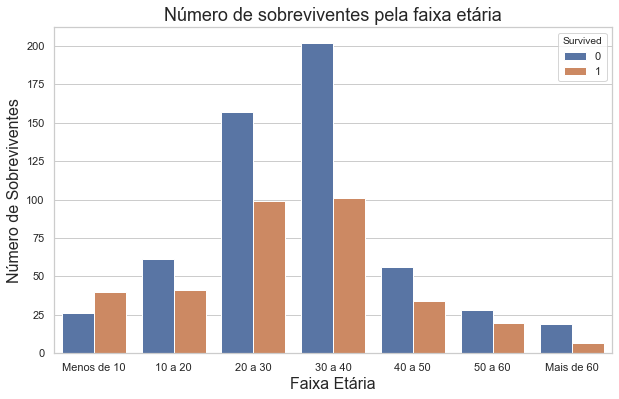

In [20]:
# Plotando o gráfico de sobreviventes pela faixa etária. OBS: 1 é para sobreviventes e 0 é para mortos.

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.AgeRange, hue=df.Survived, data=df)
ax.xaxis.set_label_text("Faixa Etária",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Sobreviventes", fontdict={'size':16})
ax.set_title("Número de sobreviventes pela faixa etária", fontdict={'size':18})
plt.show()

No gráfico é possível ver que as pessoas na faixa etária dos 20 aos 40 foram as que mais sobreviveram, mas não tenho certeza se essa interpretação está correta, pois, o número de pessoas nesta faixa etária é maior também.

# Verificando a relação entre os sobreviventes e o sexo por faixa etária

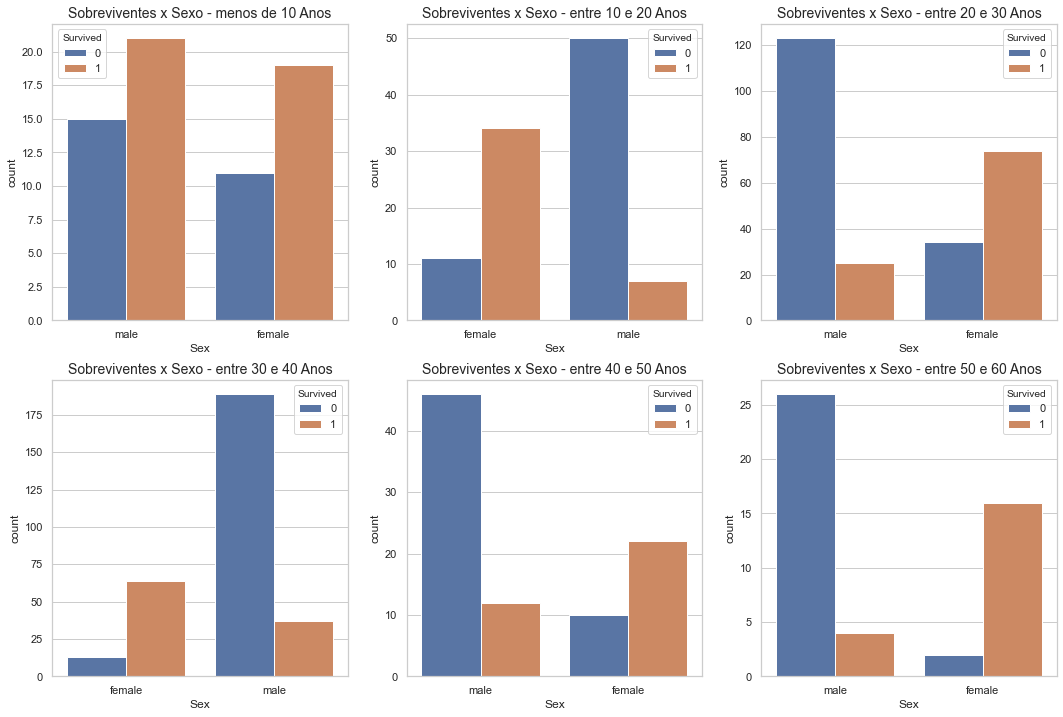

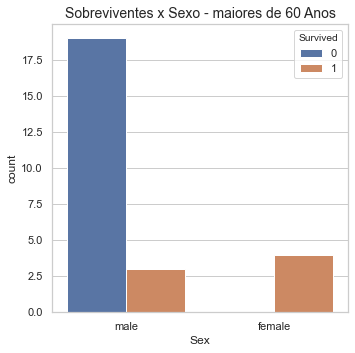

In [21]:
#Graficos de sobreviventes pelo sexo separados por idade.

menosDe10Anos = df.loc[df['Age']<10.0]
entre10e20Anos = df.query('Age>=10.0 and Age<20.0')
entre20e30Anos = df.query('Age>=20.0 and Age<30.0')
entre30e40Anos = df.query('Age>=30.0 and Age<40.0')
entre40e50Anos = df.query('Age>=40.0 and Age<50.0')
entre50e60Anos = df.query('Age>=50.0 and Age<60.0')
maisDe60Anos = df.loc[df['Age']>=60.0]

fig, ax = plt.subplots(2,3,figsize=(18,12))
sns.countplot(x=menosDe10Anos.Sex, hue=menosDe10Anos.Survived, data=menosDe10Anos, ax=ax[0][0])
ax[0, 0].set_title('Sobreviventes x Sexo - menos de 10 Anos', fontsize=14)
sns.countplot(x=entre10e20Anos.Sex, hue=entre10e20Anos.Survived, data=entre10e20Anos, ax=ax[0][1])
ax[0, 1].set_title('Sobreviventes x Sexo - entre 10 e 20 Anos', fontsize=14)
sns.countplot(x=entre20e30Anos.Sex, hue=entre20e30Anos.Survived, data=entre20e30Anos, ax=ax[0][2])
ax[0, 2].set_title('Sobreviventes x Sexo - entre 20 e 30 Anos', fontsize=14)
sns.countplot(x=entre30e40Anos.Sex, hue=entre30e40Anos.Survived, data=entre30e40Anos, ax=ax[1][0])
ax[1, 0].set_title('Sobreviventes x Sexo - entre 30 e 40 Anos', fontsize=14)
sns.countplot(x=entre40e50Anos.Sex, hue=entre40e50Anos.Survived, data=entre40e50Anos, ax=ax[1][1])
ax[1, 1].set_title('Sobreviventes x Sexo - entre 40 e 50 Anos', fontsize=14)
sns.countplot(x=entre50e60Anos.Sex, hue=entre50e60Anos.Survived, data=entre50e60Anos, ax=ax[1][2])
ax[1, 2].set_title('Sobreviventes x Sexo - entre 50 e 60 Anos', fontsize=14)
plt.show()
plt.figure(figsize=(5.3,5.3))
ax=sns.countplot(x=maisDe60Anos.Sex, hue=maisDe60Anos.Survived, data=maisDe60Anos)
ax.set_title('Sobreviventes x Sexo - maiores de 60 Anos', fontsize=14)
plt.show()

Percebe-se que entre as crianças menores de 10 anos, a taxa de sobreviventes é praticamente a mesma para ambos os sexos, mas essa diferença
aumenta a medida em que as idade vai aumentando também.
Conclusão: a maior parte dos sobreviventes são muheres e crianças com menos de 10 anos de idade.

# Verificando a relação entre a taxa de sobreviventes com pessoas que tinham irmãos ou cônjuges a bordo

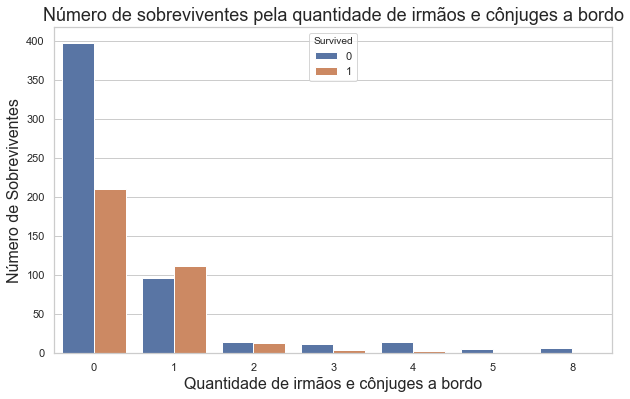

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.SibSp, hue=df.Survived, data=df)
ax.xaxis.set_label_text("Quantidade de irmãos e cônjuges a bordo",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Sobreviventes", fontdict={'size':16})
ax.set_title("Número de sobreviventes pela quantidade de irmãos e cônjuges a bordo", fontdict={'size':18})
plt.show()

Não consigo visualizar alguma relação entre o número de sobreviventes com o número de irmãos / cônjuge. Acredito que esta coluna não será relacionada no modelo computacional. 

# Verificando a relação entre a taxa de sobreviventes com pessoas que tinham pais / filhos a bordo

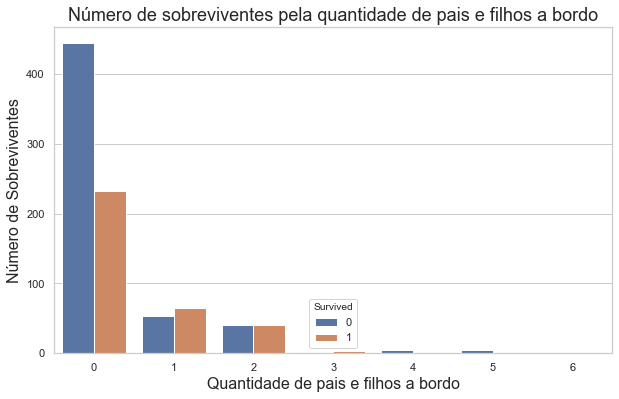

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.Parch, hue=df.Survived, data=df)
ax.xaxis.set_label_text("Quantidade de pais e filhos a bordo",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Sobreviventes", fontdict={'size':16})
ax.set_title("Número de sobreviventes pela quantidade de pais e filhos a bordo", fontdict={'size':18})
plt.show()

També não consigo visualizar alguma relação entre o número de sobreviventes com o número de pais e filhos. Acredito que esta coluna não será relacionada no modelo computacional.

O ticket não será analizado, pois acredito ser apenas números aleatórios. Espera não estar errado...

# Analizando o valor de taxa de embarque pelo número de sobreviventes:

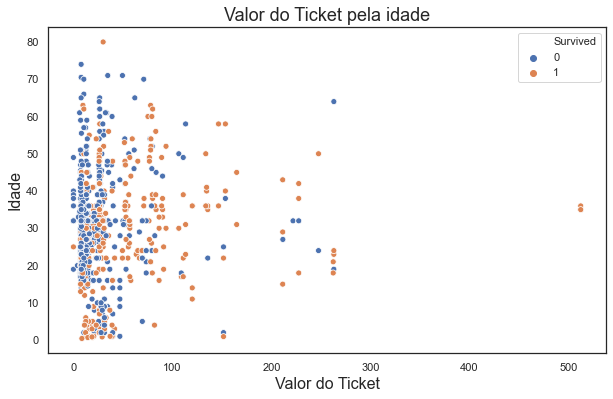

In [24]:
sns.set(style="white")
plt.figure(figsize=(10,6))

ax = sns.scatterplot(x=df.Fare, y=df.Age, hue=df.Survived, data=df)
ax.xaxis.set_label_text("Valor do Ticket",fontdict= {'size':16})
ax.yaxis.set_label_text("Idade", fontdict={'size':16})
ax.set_title("Valor do Ticket pela idade", fontdict={'size':18})
plt.show()

Percebe-se que a maioria dos que pagaram mais do que 90 libras aproximadamente sobreviveu. Vamos ver em valores numéricos.

In [25]:
#Numero de sobreviventes de quem pagou mais do que 85 libras no ticket.
classeAlta = df.query('Fare >= 85')
classeAlta.Survived.value_counts()

1    51
0    15
Name: Survived, dtype: int64

In [26]:
#transformando em porcentagem.
classeAlta.Survived.value_counts(normalize=True)

1    0.772727
0    0.227273
Name: Survived, dtype: float64

In [27]:
#Verifcando quantas mulheres de classe alta (tarifas maiores que 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeAlta.loc[classeAlta['Sex'] == 'female', 'Survived'].value_counts()

1    41
0     2
Name: Survived, dtype: int64

In [28]:
#Verifcando a porcentagem de mulheres de classe alta (tarifas maiores que 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeAlta.loc[classeAlta['Sex'] == 'female', 'Survived'].value_counts(normalize=True)

1    0.953488
0    0.046512
Name: Survived, dtype: float64

In [29]:
#Verifcando quantos homens de classe alta (tarifas maiores que 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeAlta.loc[classeAlta['Sex'] == 'male', 'Survived'].value_counts()

0    13
1    10
Name: Survived, dtype: int64

In [30]:
#Verifcando a porcentagem de homens de classe alta (tarifas maiores que 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeAlta.loc[classeAlta['Sex'] == 'male', 'Survived'].value_counts(normalize=True)

0    0.565217
1    0.434783
Name: Survived, dtype: float64

Analizando os valores para homens e mulheres percebe-se que dentre os homens que pagaram as maiores tarifas a taxa de sobrevivencia é um pouco mais alta do que a taxa de morte, já entre as mulheres percebe-se que a grande maioria sobreviveu.

Vamos analizar o mesmo gráfico novamente, mas focando em quem pagou tarifas menores no embarque.

In [31]:
menoresTarifas = df.loc[df['Fare']<85]

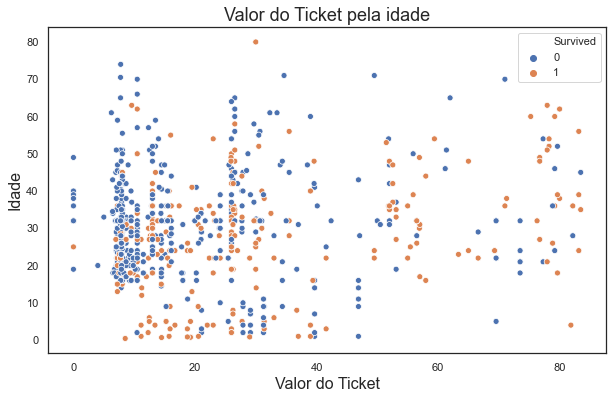

In [32]:
sns.set(style="white")
plt.figure(figsize=(10,6))

ax = sns.scatterplot(x=menoresTarifas.Fare, y=menoresTarifas.Age, hue=menoresTarifas.Survived, data=menoresTarifas)
ax.xaxis.set_label_text("Valor do Ticket",fontdict= {'size':16})
ax.yaxis.set_label_text("Idade", fontdict={'size':16})
ax.set_title("Valor do Ticket pela idade", fontdict={'size':18})
plt.show()

Visualmente percebe-se que quem pagou acima de 45 libras tem uma chance boa de sobrevivência, quem pagou entre 17 e 45 libras tem mais ou menos 50% de chance de sobreviver, mas quem pagou abaixo de 15 libras teve altas chances de morrer.

In [33]:
#Verificando a porcentagem de pessoas de classe média alta (tarifas entre 45 e 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaAlta = df.query('Fare < 85 and Fare >= 45')
classeMediaAlta.Survived.value_counts(normalize=True)

1    0.571429
0    0.428571
Name: Survived, dtype: float64

In [34]:
#Verifcando quantas mulheres de classe média alta (tarifas entre 45 e 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaAlta.loc[classeMediaAlta['Sex'] == 'female', 'Survived'].value_counts()

1    43
0     5
Name: Survived, dtype: int64

In [35]:
#Verifcando quantos homens de classe média alta (tarifas entre 45 e 85 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaAlta.loc[classeMediaAlta['Sex'] == 'male', 'Survived'].value_counts()

0    40
1    17
Name: Survived, dtype: int64

In [36]:
#Verificando a porcentagem de pessoas de classe média baixa (tarifas entre 17 e 45 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaBaixa = df.query('Fare < 45 and Fare >= 17')
classeMediaBaixa.Survived.value_counts(normalize=True)

0    0.558036
1    0.441964
Name: Survived, dtype: float64

In [37]:
#Verifcando quantas mulheres de classe média baixa (tarifas entre 17 e 45 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaBaixa.loc[classeMediaBaixa['Sex'] == 'female', 'Survived'].value_counts()

1    62
0    30
Name: Survived, dtype: int64

In [38]:
#Verifcando quantos homens de classe média baixa (tarifas entre 17 e 45 libras) que sobreviveram e morreram no nufrágio do titanic.

classeMediaBaixa.loc[classeMediaBaixa['Sex'] == 'male', 'Survived'].value_counts()

0    95
1    37
Name: Survived, dtype: int64

In [39]:
#Verificando a porcentagem de pessoas de classe baixa (tarifas menores de 17 libras) que sobreviveram e morreram no nufrágio do titanic.

classeBaixa = df.query('Fare < 17')
classeBaixa.Survived.value_counts(normalize=True)

0    0.733871
1    0.266129
Name: Survived, dtype: float64

In [40]:
#Verifcando quantas mulheres de classe baixa (tarifas menores de 17 libras) que sobreviveram e morreram no nufrágio do titanic.

classeBaixa.loc[classeBaixa['Sex'] == 'female', 'Survived'].value_counts()

1    87
0    44
Name: Survived, dtype: int64

In [41]:
#Verifcando quantos homens de classe baixa (tarifas menores de 17 libras) que sobreviveram e morreram no nufrágio do titanic.

classeBaixa.loc[classeBaixa['Sex'] == 'male', 'Survived'].value_counts()

0    320
1     45
Name: Survived, dtype: int64

Ainda não foi analizado a classe de cada passageiro do Titanic, mas acredito que ela está proporcional ao valor do ticket pago pelos passageiros. Vamos fazer um scatterplot para verificar essa hipótese.

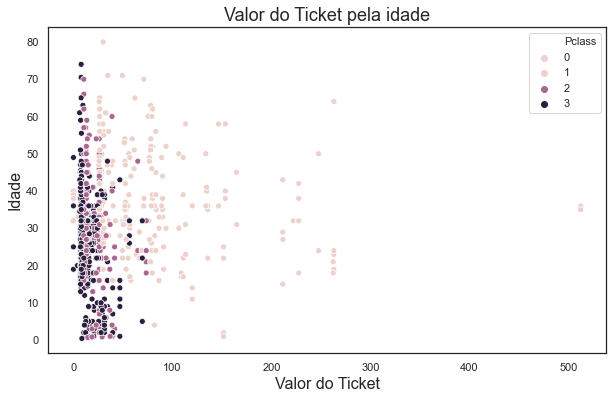

In [42]:
sns.set(style="white")
plt.figure(figsize=(10,6))

ax = sns.scatterplot(x=df.Fare, y=df.Age, hue=df.Pclass, data=df)
ax.xaxis.set_label_text("Valor do Ticket",fontdict= {'size':16})
ax.yaxis.set_label_text("Idade", fontdict={'size':16})
ax.set_title("Valor do Ticket pela idade", fontdict={'size':18})
plt.show()

Vamos filtrar o gráfico para passageiros que pagaram menos que 85 libras para ter uma ideia melhor e compará-lo com o gráfico de sobreviventes.

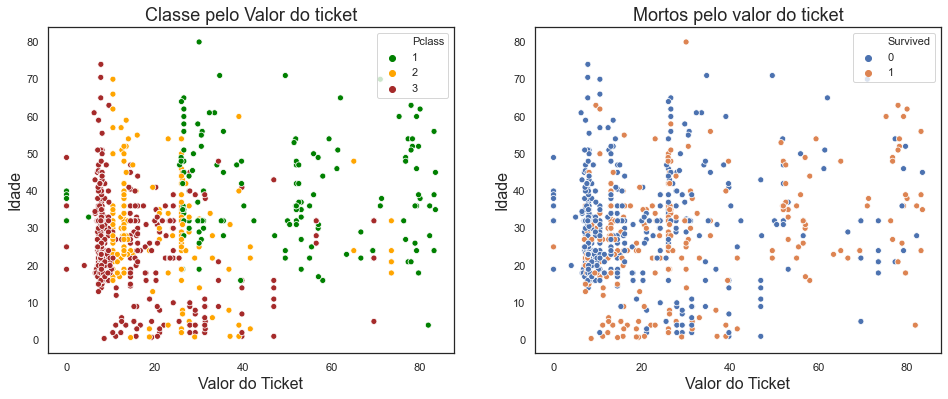

In [43]:
sns.set(style="white")
fig, ax = plt.subplots(1,2,figsize=(16,6))

sns.scatterplot(x=menoresTarifas.Fare, y=menoresTarifas.Age, hue=menoresTarifas.Pclass, data=menoresTarifas, ax=ax[0], 
                 palette=['green','orange','brown'])
ax[0].xaxis.set_label_text("Valor do Ticket",fontdict= {'size':16})
ax[0].yaxis.set_label_text("Idade", fontdict={'size':16})
ax[0].set_title("Classe pelo Valor do ticket", fontdict={'size':18})

sns.scatterplot(x=menoresTarifas.Fare, y=menoresTarifas.Age, hue=menoresTarifas.Survived, data=menoresTarifas, ax=ax[1])
ax[1].xaxis.set_label_text("Valor do Ticket",fontdict= {'size':16})
ax[1].yaxis.set_label_text("Idade", fontdict={'size':16})
ax[1].set_title("Mortos pelo valor do ticket", fontdict={'size':18})
plt.show()

Não ficou muito não deu para tirar muitas conclusões relevantes com relação a classe e número de sobreviventes, tirando obviamente os sobreviventes da primeira classe, mas mesmo assim acredito que a classe não precisa ser considerada no treinamento do algoritmo, já que o valor pago nos tickets nos da intervalos melhores para essa decisão. De qualquer forma, treinarei os dois modelos para verificar se eu estou certo ou não.

In [44]:
menoresTarifas.Pclass.value_counts()

3    491
2    184
1    150
Name: Pclass, dtype: int64

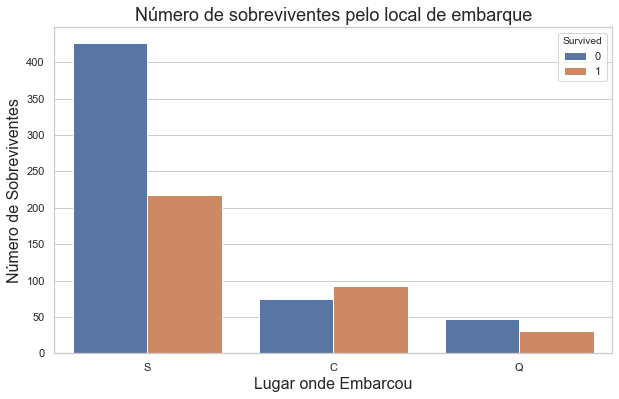

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

ax = sns.countplot(x=df.Embarked, hue=df.Survived, data=df)
ax.xaxis.set_label_text("Lugar onde Embarcou",fontdict= {'size':16})
ax.yaxis.set_label_text("Número de Sobreviventes", fontdict={'size':16})
ax.set_title("Número de sobreviventes pelo local de embarque", fontdict={'size':18})
plt.show()

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName,LastName,treatmentPronoun,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Owen Harris,Mr,20 a 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs,30 a 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Laina,Miss,20 a 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Jacques Heath (Lily May Peel),Mrs,30 a 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,William Henry,Mr,30 a 40


In [47]:
df.drop(columns=['FirstName', 'LastName'], inplace=True)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,treatmentPronoun,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,20 a 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30 a 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,20 a 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30 a 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30 a 40


In [49]:
dfML = df.loc[:,['Survived', 'Sex', 'Fare', 'AgeRange']]
dfML.head()

,Survived,Sex,Fare,AgeRange
0,0,male,7.2500,20 a 30
1,1,female,71.2833,30 a 40
2,1,female,7.9250,20 a 30
3,1,female,53.1000,30 a 40
4,0,male,8.0500,30 a 40


In [50]:
bins = [-1, 16.999, 44.999, 85.999, 999]
valorTicket = ['Menos de 17','17 a 45','45 a 85','Mais de 85']

dfML['FareRange'] = pd.cut(dfML['Fare'], bins, labels=valorTicket)
dfML.head(5)

,Survived,Sex,Fare,AgeRange,FareRange
0,0,male,7.2500,20 a 30,Menos de 17
1,1,female,71.2833,30 a 40,45 a 85
2,1,female,7.9250,20 a 30,Menos de 17
3,1,female,53.1000,30 a 40,45 a 85
4,0,male,8.0500,30 a 40,Menos de 17


In [51]:
dfML = dfML.loc[:, ['Survived', 'Sex', 'AgeRange', 'FareRange']]

In [52]:
dfML.head()

,Survived,Sex,AgeRange,FareRange
0,0,male,20 a 30,Menos de 17
1,1,female,30 a 40,45 a 85
2,1,female,20 a 30,Menos de 17
3,1,female,30 a 40,45 a 85
4,0,male,30 a 40,Menos de 17


In [53]:
dfML.isnull().sum()

Survived     0
Sex          0
AgeRange     0
FareRange    0
dtype: int64

A principio vamos tentar resolver o problema com a função de Regressão Logistica do sklearn.

In [54]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [55]:
X = dfML.drop('Survived', axis='columns')
Y = dfML.Survived

In [56]:
transformacao_colunas = make_column_transformer((OneHotEncoder(), ['Sex', 'AgeRange', 'FareRange']), remainder='passthrough')
logreg = LogisticRegression(solver='lbfgs')

In [57]:
transformacao_colunas.fit_transform(X)

<891x13 sparse matrix of type '<class 'numpy.float64'>'
	with 2673 stored elements in Compressed Sparse Row format>

In [58]:
pipe = make_pipeline(transformacao_colunas, logreg)

In [59]:
cross_val_score(pipe, X, Y, cv=10, scoring='accuracy').mean()

0.7833707865168539

In [60]:
dfML1 = dfML.copy()

In [61]:
dfML1['Pclass'] = df['Pclass']
dfML1.head()

,Survived,Sex,AgeRange,FareRange,Pclass
0,0,male,20 a 30,Menos de 17,3
1,1,female,30 a 40,45 a 85,1
2,1,female,20 a 30,Menos de 17,3
3,1,female,30 a 40,45 a 85,1
4,0,male,30 a 40,Menos de 17,3


In [62]:
X1 = dfML1.drop('Survived', axis='columns')
Y1 = dfML1.Survived

In [63]:
transformacao_colunas = make_column_transformer((OneHotEncoder(), ['Sex', 'AgeRange', 'FareRange']), remainder='passthrough')
logreg = LogisticRegression(solver='lbfgs')

In [64]:
transformacao_colunas.fit_transform(X1)

<891x14 sparse matrix of type '<class 'numpy.float64'>'
	with 3564 stored elements in Compressed Sparse Row format>

In [65]:
pipe = make_pipeline(transformacao_colunas, logreg)

In [66]:
cross_val_score(pipe, X1, Y1, cv=10, scoring='accuracy').mean()

0.7822471910112361

A acurácia trazida pelo modelo tanto com classe, quanto sem classe não me agradou muito. Vamos utilizar o algoritimo do vizinho mais próximo ou K nearest neighboors – KNN

In [67]:
X2 = dfML1.drop('Survived', axis='columns')
Y2 = dfML1.Survived

In [68]:
k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    model = Pipeline(steps=[
        ('one-hot encoder', OneHotEncoder()),
        ('imputer', SimpleImputer(strategy='mean')),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    scores = cross_val_score(model, X2, Y2, cv=10, scoring='accuracy').mean()
    k_scores.append(scores.mean())
print(k_scores)

[0.7654556803995006, 0.7677153558052434, 0.778876404494382, 0.8114232209737828, 0.8148314606741573, 0.8092134831460674, 0.8036204744069912, 0.8147940074906368, 0.8137078651685392, 0.8147815230961297, 0.8114232209737828, 0.8091760299625468, 0.8024719101123596, 0.8114357053682897, 0.810287141073658, 0.7945942571785267, 0.7934706616729088, 0.790099875156055, 0.7867415730337078, 0.7912484394506866, 0.7912484394506867, 0.7991136079900125, 0.7946067415730338, 0.7934831460674158, 0.7912359550561798, 0.7957303370786517, 0.7856304619225967, 0.7878776529338326, 0.7867540574282147, 0.7856304619225967]


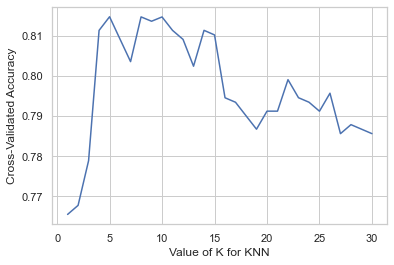

In [69]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [70]:
model = Pipeline(steps=[
        ('one-hot encoder', OneHotEncoder()),
        ('imputer', SimpleImputer(strategy='mean')),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ])
scores = cross_val_score(model, X2, Y2, cv=10, scoring='accuracy').mean()
print(scores)

0.8148314606741573


O resultado está melhor do que na regressão logística. Vamos tentar agora com a árvore de regressão.

In [71]:
X3 = dfML1.drop('Survived', axis='columns')
Y3 = dfML1.Survived

In [72]:
k_range = list(range(1, 20))
k_scores = []

for k in k_range:
    model = Pipeline(steps=[
        ('one-hot encoder', OneHotEncoder()),
        ('imputer', SimpleImputer(strategy='mean')),
        ('tree', DecisionTreeClassifier(max_depth=k, random_state=0))
    ])
    scores = cross_val_score(model, X3, Y3, cv=10, scoring='accuracy').mean()
    k_scores.append(scores.mean())
print(k_scores)

[0.786729088639201, 0.7733458177278403, 0.802434456928839, 0.8203870162297127, 0.8192259675405742, 0.8069038701622973, 0.8046691635455681, 0.800187265917603, 0.804681647940075, 0.802434456928839, 0.7991011235955057, 0.7991011235955057, 0.7991011235955057, 0.7991011235955057, 0.7991011235955057, 0.7991011235955057, 0.7991011235955057, 0.7991011235955057, 0.7991011235955057]


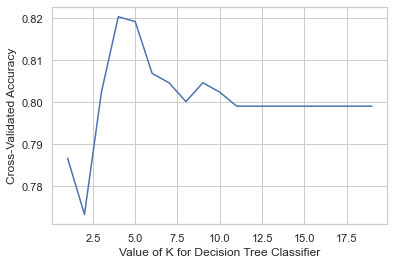

In [73]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for Decision Tree Classifier')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [74]:
model = Pipeline(steps=[
        ('one-hot encoder', OneHotEncoder()),
        ('imputer', SimpleImputer(strategy='mean')),
        ('tree', DecisionTreeClassifier(max_depth=4, random_state=0))
    ])
scores = cross_val_score(model, X3, Y3, cv=10, scoring='accuracy').mean()
print(scores)

0.8203870162297127


O melhor resultado obtido foi com o algoritmo da Arvore de decisão. Portanto esse será o agoritimo ultilizado para gerar os resultados.

In [75]:
model.fit(X3, Y3)

Pipeline(memory=None,
         steps=[('one-hot encoder',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=True)),
                ('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0

# Abrindo o arquivo test para executar o modelo

In [76]:
#Lendo o arquivo 'train' do titanic.

dfTest = pd.read_csv('https://raw.githubusercontent.com/fthara/titanicKaggle/master/dataSets/test.csv')
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
#Verificando a existencia de arquivos NA

dfTest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Existem 86 idades 'NA', precisamos tratar esses dados antes de aplicar o algoritmo.

In [78]:
#Separando o primero nome do ultimo nome.
# new data frame with split value columns 
new = dfTest["Name"].str.split(",", n = 1, expand = True) 

#Adicionando as novas colunas ao dataframe
# making separate first name column from new data frame 
dfTest["FirstName"]= new[0] 
  
# making separate last name column from new data frame 
dfTest["LastName"]= new[1]
  
# df display 
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,Mr. James
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,Mrs. James (Ellen Needs)
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Mr. Thomas Francis
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Mr. Albert
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Mrs. Alexander (Helga E Lindqvist)


In [79]:
#Fazendo o mesmo processo para separar os nomes pelo pronome de tratamento.

# new data frame with split value columns 
new = dfTest["LastName"].str.split(".", n = 1, expand = True) 

#Adicionando as novas colunas ao dataframe
# making separate first name column from new data frame 
dfTest["treatmentPronoun"]= new[0] 
  
# making separate last name column from new data frame 
dfTest["LastName"]= new[1]
  
# df display 
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName,treatmentPronoun
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,James,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,James (Ellen Needs),Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Thomas Francis,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Albert,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Alexander (Helga E Lindqvist),Mrs


In [80]:
#As strings da coluna 'treatmentPronoun'estão com um espaço em branco na frente. Vamos retirá-los.

dfTest['treatmentPronoun']=dfTest['treatmentPronoun'].str.strip()
#Verificando quantos tipos de pronomes de tratamento tem nesta lista.
dfTest.treatmentPronoun.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: treatmentPronoun, dtype: int64

In [81]:
#Verificando o número de cada pronome de tratamento com 'Age' igual a 'NaN'

dfTest.loc[dfTest['Age'].isnull()==True].treatmentPronoun.value_counts()

Mr        57
Miss      14
Mrs       10
Master     4
Ms         1
Name: treatmentPronoun, dtype: int64

In [82]:
#Adicionando a idade média nos campos com idade igual a 'NaN'

def addIdade(columnTP):
    if columnTP == 'Mr':
        return 32
    elif columnTP == 'Miss':
        return 22
    elif columnTP == 'Mrs':
        return 36
    elif columnTP == 'Master':
        return 5
    else: #(MS)
        return 28
    
dfTest.loc[dfTest['Age'].isna()==True, 'Age'] = dfTest.loc[dfTest['Age'].isna()==True].apply(lambda x: addIdade(x.treatmentPronoun), axis=1)
dfTest.Age.isna().value_counts()

False    418
Name: Age, dtype: int64

In [83]:
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 999]
faixaEtaria = ['Menos de 10','10 a 20','20 a 30', '30 a 40', '40 a 50', '50 a 60', 'Mais de 60']

dfTest['AgeRange'] = pd.cut(df['Age'], bins, labels=faixaEtaria)
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName,treatmentPronoun,AgeRange
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,James,Mr,20 a 30
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,James (Ellen Needs),Mrs,30 a 40
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Thomas Francis,Mr,20 a 30
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Albert,Mr,30 a 40
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Alexander (Helga E Lindqvist),Mrs,30 a 40


Também existe um valor de Fare que é NA, vamos tomar a mesma medida que foi tomada em Age para resolver este problema, mas dessa vez pegando a média de Fare de acordo com a Pclass.

In [84]:
dfTest.loc[dfTest.Fare.isna()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName,treatmentPronoun,AgeRange
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Storey,Thomas,Mr,50 a 60


In [85]:
#A Pclas é 3, portanto vamos verificar a média de fare em cada classe, excluindo este passageiro.

mediaFare = dfTest.loc[dfTest['Fare'].isna()==False]
mediaFare = dfTest.groupby('Pclass')['Fare'].mean().round(4)
mediaFare

Pclass
1    94.2803
2    22.2021
3    12.4597
Name: Fare, dtype: float64

In [86]:
#adicionando o valor no Fare do passageiro.

dfTest.loc[dfTest.Fare.isna()==True, ['Fare']] = 12.4597

In [87]:
dfTest.isna().sum()

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               327
Embarked              0
FirstName             0
LastName              0
treatmentPronoun      0
AgeRange              0
dtype: int64

In [88]:
bins = [-1, 16.999, 44.999, 85.999, 999]
valorTicket = ['Menos de 17','17 a 45','45 a 85','Mais de 85']

dfTest['FareRange'] = pd.cut(dfTest['Fare'], bins, labels=valorTicket)
dfTest.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName,treatmentPronoun,AgeRange,FareRange
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,James,Mr,20 a 30,Menos de 17
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,James (Ellen Needs),Mrs,30 a 40,Menos de 17
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Thomas Francis,Mr,20 a 30,Menos de 17
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Albert,Mr,30 a 40,Menos de 17
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Alexander (Helga E Lindqvist),Mrs,30 a 40,Menos de 17


In [89]:
dfPredic = dfTest.copy()

In [90]:
dfTest = dfTest.loc[:, ['Sex', 'AgeRange', 'FareRange', 'Pclass']]
dfTest.head()

,Sex,AgeRange,FareRange,Pclass
0,male,20 a 30,Menos de 17,3
1,female,30 a 40,Menos de 17,3
2,male,20 a 30,Menos de 17,2
3,male,30 a 40,Menos de 17,3
4,female,30 a 40,Menos de 17,3


In [91]:
XTest = dfTest

In [92]:
y = model.predict(XTest)

In [93]:
y

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [94]:
dfResp = pd.read_csv('https://raw.githubusercontent.com/fthara/titanicKaggle/master/dataSets/test.csv')
dfResp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [95]:
predict = dfResp.loc[:, ['PassengerId']]
predict.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [96]:
predict['Survived']=y.tolist()
predict.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [97]:
predict.to_csv(r'dataSets/predict.csv',index=False)

A pontuação no Kaggle foi de 0.76076, vou tentar manipular mais algumas coisas no meu dataset e usar outros algoritimos para melhorá-lo.

# Primeiro vou testar o algoritmo SVC.

In [98]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform
import numpy as np

np.random.seed(50)

Tentei fazer rodar o algoritmo com o 'cross_val_score', mas demorou muito e não terminou. Portanto vou fazer utilizando o "train_test_split".

In [99]:
X4 = dfML1.drop('Survived', axis='columns')
y4 = dfML1['Survived']

In [100]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X4, y4)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(668, 4)
(223, 4)
(668,)
(223,)


In [101]:
transformacao_colunas = make_column_transformer((OneHotEncoder(), ['Sex', 'AgeRange', 'FareRange', 'Pclass']), remainder='passthrough')

In [102]:
x_treino = transformacao_colunas.fit_transform(x_treino)

In [103]:
x_teste = transformacao_colunas.transform(x_teste)

In [104]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

In [105]:
param_grid = {'C': [0.1,10, 100, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=1)
svc_grid.fit(x_treino,y_treino)
sc_svc = get_best_score(svc_grid)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8278606965174129
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    6.9s finished


In [106]:
x_teste = svc_grid.predict(x_teste)

In [107]:
accuracy_score(y_teste, x_teste, normalize=True, sample_weight=None)

0.820627802690583

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
X5 = dfML1.drop('Survived', axis='columns')
y5 = dfML1.Survived

In [110]:
transformacao_colunas = make_column_transformer((OneHotEncoder(), ['Sex', 'AgeRange', 'FareRange', 'Pclass']), remainder='passthrough')

In [111]:
rfc = RandomForestClassifier()

In [112]:
pipe = make_pipeline(transformacao_colunas, rfc)

In [113]:
cross_val_score(pipe, X5, y5, cv=10, scoring='accuracy').mean()

0.8024719101123596

Os resultados não foram satisfatórios. Vamos ter que manipular os dados do data frame para tentar melhorá-lo.

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,treatmentPronoun,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,20 a 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30 a 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,20 a 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30 a 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30 a 40


In [115]:
df.rename(columns={'treatmentPronoun':'Title'}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,20 a 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30 a 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,20 a 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30 a 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30 a 40


Vamos analisar a relação de parentesco entre os passageiros novamente. Para isso, vamos criar uma nova coluna "FamilySize", que vai nos dar quantos familiares de cada passageiro existe no dataframe.

# Análise de Familiares

In [116]:
#criando a coluna FamilySize

df['FamilySize'] = df.SibSp + df.Parch
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,20 a 30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30 a 40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,20 a 30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30 a 40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30 a 40,0
5,6,0,3,"Moran, Mr. James",male,32.0,0,0,330877,8.4583,Q,Mr,30 a 40,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,50 a 60,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,Menos de 10,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs,20 a 30,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,10 a 20,1


In [117]:
#definido a quantidade de sobreviventes por familiares

numSurvived = df.groupby('FamilySize')['Survived'].count()
numSurvived

FamilySize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Survived, dtype: int64

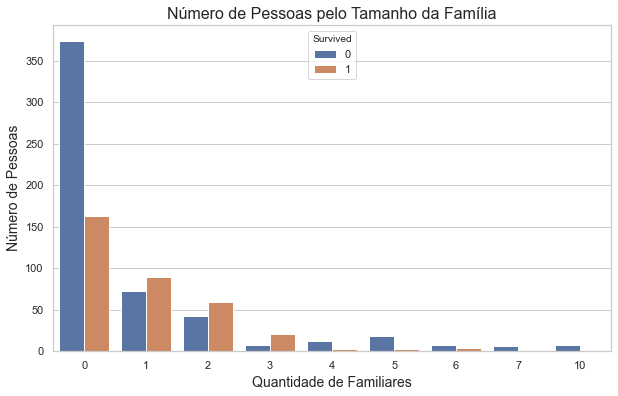

In [118]:
# Plotando o gráfico de countplot

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax = sns.countplot(x=df.FamilySize, hue=df.Survived)
ax.set_title("Número de Pessoas pelo Tamanho da Família", fontdict={'size':16})
ax.xaxis.set_label_text("Quantidade de Familiares",fontdict={'size':14})
ax.yaxis.set_label_text("Número de Pessoas", fontdict={'size':14})
plt.show()

<p style="text-indent: 1cm;">O gráfico nos diz que quem tem de 1 a 3 familiares teve mais chance de sobreviver do que quem tem de 4 a mais faliares, que os da uma chance quase zero de sobrevivência, chegando a zero com 7 e 10 familiares. Aogra quem não teve nenhum familiar na viagem teve aproximadamente 30% de chance de sobreviver.<p>
<p style="text-indent: 1cm;">Conclusão: a coluna 'FamilySize'tem uma influência relevante para o nossa previsão, portanto será utilizada.<p>
<p style="text-indent: 1cm;">Agora vamos analizar se o título dado a cada pessoa influencia ou não em nossa previsão.<p>

# Análise por título

In [119]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,20 a 30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30 a 40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,20 a 30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30 a 40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30 a 40,0


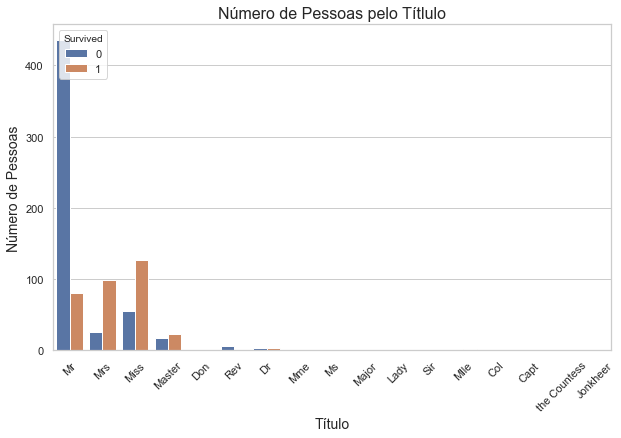

In [120]:
# Plotando o gráfico de countplot

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax = sns.countplot(x=df.Title, hue=df.Survived)
ax.set_title("Número de Pessoas pelo Títlulo", fontdict={'size':16})
ax.xaxis.set_label_text("Título",fontdict={'size':14})
ax.yaxis.set_label_text("Número de Pessoas", fontdict={'size':14})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

<p style="text-indent: 1cm;">Este gráfico não ficou bom, pois os valores estão muito discrepantes, enquanto temos mais de 400 títulos "Mr", temos apenas 1 "Major", "Capt", etc.<p>
<p style="text-indent: 1cm;">Para resolver isto vou divir o gráfico em dois grupos, de forma que fique mais clara a visualização.<p>

In [121]:
g1 = df.query('Title == ["Mr", "Mrs", "Miss", "Master"]')
g2 = df.query('Title == ["Don", "Rev", "Dr", "Mme", "Ms", "Major", "Lady", "Sir", "Mlle", "Col", "Capt", "the Countness", "Jonkheer"]')

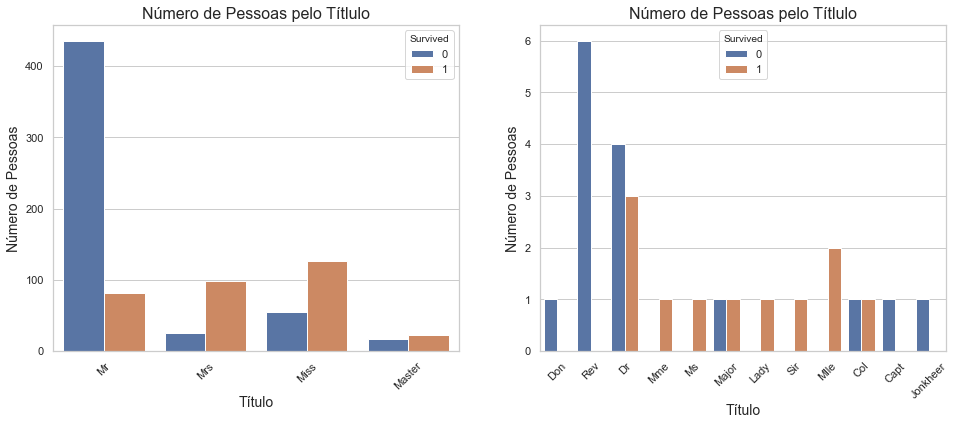

In [122]:
# Plotando os gráfico um do lado do outro.

fig, ax = plt.subplots(1,2, figsize=(16, 6))

#Gráfico g1
sns.countplot(x=g1.Title, hue=g1.Survived, ax=ax[0])
ax[0].set_title("Número de Pessoas pelo Títlulo", fontdict={'size':16})
ax[0].xaxis.set_label_text("Título",fontdict={'size':14})
ax[0].yaxis.set_label_text("Número de Pessoas", fontdict={'size':14})
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

#Gráfico g2
sns.countplot(x=g2.Title, hue=g2.Survived, ax=ax[1])
ax[1].set_title("Número de Pessoas pelo Títlulo", fontdict={'size':16})
ax[1].xaxis.set_label_text("Título",fontdict={'size':14})
ax[1].yaxis.set_label_text("Número de Pessoas", fontdict={'size':14})
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.show()

<p style="text-indent: 1cm;">Estes gráficos são muito interessantes, pois dividindo os nomes por título conseguimos saber sexo da maioria de les, a faixa etária, e o quanto a pessoa é importante e até mesmo a condição financeira deles. Uma coluna que com toda certeza deve ser considerada no algoritmo.<p>
<p style="text-indent: 1cm;">Após analizar estas duas colunas a mais vamos fazer a análise e ver o quanto nossa predição irá melhorar.<p>

# Predição do problema

In [123]:
X = dfML.drop('Survived', axis='columns')
Y = dfML.Survived
transformacao_colunas = make_column_transformer((OneHotEncoder(), ['Sex', 'AgeRange', 'FareRange']), remainder='passthrough')
logreg = LogisticRegression(solver='lbfgs')
transformacao_colunas.fit_transform(X)
pipe = make_pipeline(transformacao_colunas, logreg)
cross_val_score(pipe, X, Y, cv=10, scoring='accuracy').mean()

0.7833707865168539

In [124]:
#Adicionando a coluna FareRange em meu dataframe

bins = [-1, 16.999, 44.999, 85.999, 999]
valorTicket = ['Menos de 17','17 a 45','45 a 85','Mais de 85']

df['FareRange'] = pd.cut(df['Fare'], bins, labels=valorTicket)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,FamilySize,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,20 a 30,1,Menos de 17
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30 a 40,1,45 a 85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,20 a 30,0,Menos de 17
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30 a 40,1,45 a 85
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30 a 40,0,Menos de 17


In [125]:
dfTrain = df.loc[:, ['Survived', 'Pclass', 'Sex', 'Title', 'AgeRange', 'FamilySize', 'FareRange']]
dfTrain.head()

,Survived,Pclass,Sex,Title,AgeRange,FamilySize,FareRange
0,0,3,male,Mr,20 a 30,1,Menos de 17
1,1,1,female,Mrs,30 a 40,1,45 a 85
2,1,3,female,Miss,20 a 30,0,Menos de 17
3,1,1,female,Mrs,30 a 40,1,45 a 85
4,0,3,male,Mr,30 a 40,0,Menos de 17


In [126]:
listOthers = ["Don", "Rev", "Dr", "Mme", "Ms", "Major", "Lady", "Sir", "Mlle", "Col", "Capt", "the Countness", "Jonkheer"]
dfTrain.query(f'Title == {listOthers} & Sex == "female"')

,Survived,Pclass,Sex,Title,AgeRange,FamilySize,FareRange
369,1,1,female,Mme,20 a 30,0,45 a 85
443,1,2,female,Ms,20 a 30,0,Menos de 17
556,1,1,female,Lady,40 a 50,1,17 a 45
641,1,1,female,Mlle,20 a 30,0,45 a 85
710,1,1,female,Mlle,20 a 30,0,45 a 85
796,1,1,female,Dr,40 a 50,0,17 a 45


In [127]:
dfTrain.loc[(dfTrain.Title == 'Mme') & (dfTrain.Sex =='female'), 'Title'] = 'othersFemale'
dfTrain.loc[(dfTrain.Title == 'Ms') & (dfTrain.Sex =='female'), 'Title'] = 'othersFemale'
dfTrain.loc[(dfTrain.Title == 'Lady') & (dfTrain.Sex =='female'), 'Title'] = 'othersFemale'
dfTrain.loc[(dfTrain.Title == 'Mlle') & (dfTrain.Sex =='female'), 'Title'] = 'othersFemale'
dfTrain.loc[(dfTrain.Title == 'Dr') & (dfTrain.Sex =='female'), 'Title'] = 'othersFemale'
dfTrain.loc[(dfTrain.Title == 'the Countess') & (dfTrain.Sex =='female'), 'Title'] = 'othersFemale'

dfTrain.loc[(dfTrain.Title == 'Don') & (dfTrain.Sex =='male'), 'Title'] = 'othersMale'
dfTrain.loc[(dfTrain.Title == 'Rev') & (dfTrain.Sex =='male'), 'Title'] = 'othersMale'
dfTrain.loc[(dfTrain.Title == 'Dr') & (dfTrain.Sex =='male'), 'Title'] = 'othersMale'
dfTrain.loc[(dfTrain.Title == 'Major') & (dfTrain.Sex =='male'), 'Title'] = 'othersMale'
dfTrain.loc[(dfTrain.Title == 'Sir') & (dfTrain.Sex =='male'), 'Title'] = 'othersMale'
dfTrain.loc[(dfTrain.Title == 'Col') & (dfTrain.Sex =='male'), 'Title'] = 'othersMale'
dfTrain.loc[(dfTrain.Title == 'Capt') & (dfTrain.Sex =='male'), 'Title'] = 'othersMale'
dfTrain.loc[(dfTrain.Title == 'Jonkheer') & (dfTrain.Sex =='male'), 'Title'] = 'othersMale'
#dfTrain.query(f'Title == {listOthers} & Sex == "female"').Title.replace(to_replace=listOthers, value='othersFemale', inplace=True)
#dfTrain.query(f'Title == {listOthers} & Sex == "male"').Title.replace(to_replace=listOthers, value='othersMale', inplace=True)
#.replace(value='othersFemale', inplace=True)
#titleOtherFemale = others.query('Sex == "female"')
#titleOtherFemale['Title'].replace(to_replace=listOthers, value='othersFemale', inplace=True)

#titleOtherMale = others.query('Sex == "male"')
#titleOtherMale['Title'].replace(to_replace=listOthers, value='othersMale', inplace=True)

In [128]:
#k=1
#for i in titulos:
#    dfTrain['Title'].replace(to_replace=[i], value=k, inplace=True)
#    k+=1
dfTrain.head()

,Survived,Pclass,Sex,Title,AgeRange,FamilySize,FareRange
0,0,3,male,Mr,20 a 30,1,Menos de 17
1,1,1,female,Mrs,30 a 40,1,45 a 85
2,1,3,female,Miss,20 a 30,0,Menos de 17
3,1,1,female,Mrs,30 a 40,1,45 a 85
4,0,3,male,Mr,30 a 40,0,Menos de 17


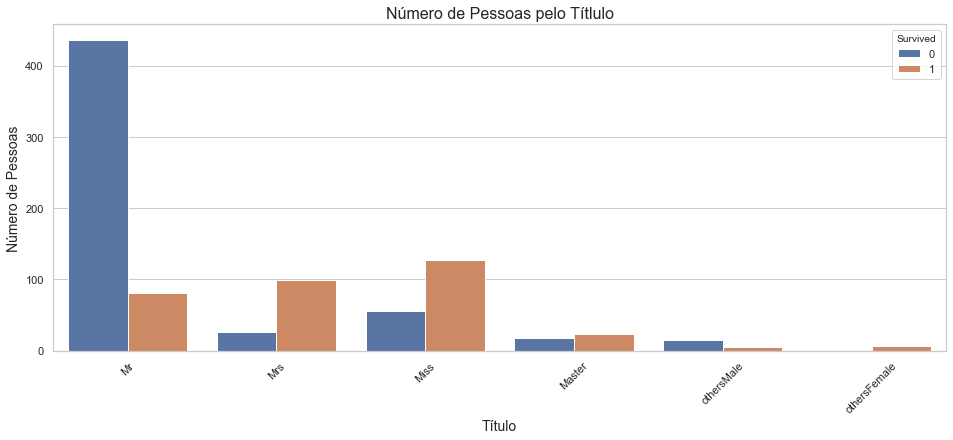

In [129]:
fig, ax = plt.subplots(1,1, figsize=(16, 6))

#Gráfico g1
sns.countplot(x=dfTrain.Title, hue=dfTrain.Survived)
ax.set_title("Número de Pessoas pelo Títlulo", fontdict={'size':16})
ax.xaxis.set_label_text("Título",fontdict={'size':14})
ax.yaxis.set_label_text("Número de Pessoas", fontdict={'size':14})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [130]:
X = dfTrain.drop('Survived', axis='columns')
y = dfTrain.Survived

In [131]:
transCol = make_column_transformer((OneHotEncoder(), ['Pclass', 'Sex', 'Title', 'AgeRange', 'FamilySize', 'FareRange']),
                                   remainder='passthrough')

## Usando Regressão Logística

In [132]:
logreg = LogisticRegression(solver='lbfgs')

In [133]:
pipe = pipe = make_pipeline(transCol, logreg)

In [134]:
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.8181897627965045

<p style="text-indent: 1cm;">O resultado foi melhor do que na primeira tentativa, vamos resolver com os outros algoritmos e ver qual se sai melhor.<p>

## Usando o KNN

In [135]:
from sklearn.model_selection import GridSearchCV

In [539]:
knn = KNeighborsClassifier()

In [137]:
#pipe = pipe = make_pipeline(transCol, knn)

In [138]:
X = transCol.fit_transform(X)

In [139]:
param_grid = {'n_neighbors': list(range(1,31)),
              'weights':['uniform', 'distance']}
knn_grid = GridSearchCV(knn,
                        param_grid,
                        cv=10,
                        refit=True,
                        verbose=1,
                        scoring = 'accuracy',
                        n_jobs = -1)
knn_grid.fit(X,y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    4.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [140]:
knn_grid.best_score_

0.826079900124844

## Usando o SVC

In [141]:
param_grid = {'C': [0.1,10, 100, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=1)
svc_grid.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   13.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10, 100, 1000, 5000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [142]:
svc_grid.best_score_

0.8316479400749064

## Usando o Random Forest Classifier

In [143]:
rfc = RandomForestClassifier()

In [144]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [145]:
rfc_grid = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)
rfc_grid.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [146]:
rfc_grid.best_score_

0.832796504369538

## Usando a árvore de decisão

In [399]:
X = dfTrain.drop('Survived', axis='columns')
y = dfTrain.Survived

In [400]:
#model = Pipeline(steps=[
#        ('one-hot encoder', OneHotEncoder()),
#        ('imputer', SimpleImputer(strategy='mean')),
#        ('tree', DecisionTreeClassifier())
#    ])
#scores = cross_val_score(model, X3, Y3, cv=10, scoring='accuracy').mean()
#print(scores)

In [401]:
transCol = make_column_transformer((OneHotEncoder(), ['Pclass', 'Sex', 'Title', 'AgeRange', 'FamilySize', 'FareRange']),
                                  remainder='passthrough')

In [402]:
#X = transCol.fit_transform(X)

In [403]:
tree = DecisionTreeClassifier()

In [411]:
#pipe = make_pipeline(transCol, tree)
pipe = Pipeline([
    ('trans', transCol),
    ('clf', tree)
])

In [412]:
param_grid = {'clf__criterion':['gini','entropy'],'clf__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [413]:
tree_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

In [414]:
#cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

In [415]:
tree_grid.fit(X, y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('trans',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                            

In [416]:
tree_grid.best_score_

0.8405742821473158

In [289]:
#preprocess = make_column_transformer(
#    (['Pclass', 'Sex', 'Title', 'AgeRange', 'FamilySize', 'FareRange'], OneHotEncoder())
#)

<p style="text-indent: 1cm;">O algoritimo da árvore de decisão teve a melhor acurácia, além de que é um dos algoritimo mais rápido dentre os encolhidos. Portanto ele será utilizado para a predição do Titanic<p>

# Segunda predição para o Titanic

In [465]:
dfPredict = dfPredic.copy()
dfPredict.head()
dfPredict.shape

(418, 16)

In [466]:
dfTrain.head()

,Survived,Pclass,Sex,Title,AgeRange,FamilySize,FareRange
0,0,3,male,Mr,20 a 30,1,Menos de 17
1,1,1,female,Mrs,30 a 40,1,45 a 85
2,1,3,female,Miss,20 a 30,0,Menos de 17
3,1,1,female,Mrs,30 a 40,1,45 a 85
4,0,3,male,Mr,30 a 40,0,Menos de 17


In [467]:
dfPredict['FamilySize'] = dfPredict.SibSp + dfPredict.Parch
dfPredict.rename(columns={'treatmentPronoun':'Title'}, inplace=True)
dfPredict.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName,Title,AgeRange,FareRange,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Kelly,James,Mr,20 a 30,Menos de 17,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Wilkes,James (Ellen Needs),Mrs,30 a 40,Menos de 17,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Myles,Thomas Francis,Mr,20 a 30,Menos de 17,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Wirz,Albert,Mr,30 a 40,Menos de 17,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Hirvonen,Alexander (Helga E Lindqvist),Mrs,30 a 40,Menos de 17,2


In [468]:
listOthers = ["Don", "Rev", "Dr", "Mme", "Ms", "Major", "Lady", "Sir", "Mlle", "Col", "Capt", "the Countness", "Jonkheer"]
dfPredict.query(f'Title == {listOthers} & Sex == "female"').Title

88    Ms
Name: Title, dtype: object

In [469]:
dfPredict.loc[(dfPredict.Title == 'Ms') & (dfPredict.Sex =='female'), 'Title'] = 'othersFemale'
dfPredict.loc[(dfPredict.Title == 'Dona') & (dfPredict.Sex =='female'), 'Title'] = 'othersFemale'

In [470]:
dfPredict.query(f'Title == {listOthers} & Sex == "male"').Title

131    Col
149    Rev
164    Rev
202    Col
293     Dr
Name: Title, dtype: object

In [471]:
dfPredict.loc[(dfPredict.Title == 'Col') & (dfPredict.Sex =='male'), 'Title'] = 'othersMale'
dfPredict.loc[(dfPredict.Title == 'Rev') & (dfPredict.Sex =='male'), 'Title'] = 'othersMale'
dfPredict.loc[(dfPredict.Title == 'Col') & (dfPredict.Sex =='male'), 'Title'] = 'othersMale'
dfPredict.loc[(dfPredict.Title == 'Dr') & (dfPredict.Sex =='male'), 'Title'] = 'othersMale'

In [472]:
XTest = dfPredict.loc[:, ['Pclass', 'Sex', 'Title', 'AgeRange', 'FamilySize', 'FareRange']]
XTest.head()

,Pclass,Sex,Title,AgeRange,FamilySize,FareRange
0,3,male,Mr,20 a 30,0,Menos de 17
1,3,female,Mrs,30 a 40,1,Menos de 17
2,2,male,Mr,20 a 30,0,Menos de 17
3,3,male,Mr,30 a 40,0,Menos de 17
4,3,female,Mrs,30 a 40,2,Menos de 17


In [473]:
yPredict = tree_grid.predict(XTest)
yPredict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [476]:
predict1 = dfPredict.PassengerId.to_frame()
predict1.head()
predict1.shape

(418, 1)

In [477]:
predict1['Survived']=yPredict.tolist()
predict1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [478]:
predict1.to_csv(r'dataSets/predict2.csv',index=False)

<p style="text-indent: 1cm;">O resltado da segunda predição foi de 79%, uma pequena melhora em relação à previsão anterior. Vou adicionar a coluna "Embarked" e ver se melhora ainda mais minha predição.<p>

# Adicionando a coluna Embarked

In [483]:
dfPredict3 = dfTrain.copy()
dfPredict3.head()

,Survived,Pclass,Sex,Title,AgeRange,FamilySize,FareRange
0,0,3,male,Mr,20 a 30,1,Menos de 17
1,1,1,female,Mrs,30 a 40,1,45 a 85
2,1,3,female,Miss,20 a 30,0,Menos de 17
3,1,1,female,Mrs,30 a 40,1,45 a 85
4,0,3,male,Mr,30 a 40,0,Menos de 17


In [484]:
dfPredict3['Embarked'] = df['Embarked']
dfPredict3.head()

,Survived,Pclass,Sex,Title,AgeRange,FamilySize,FareRange,Embarked
0,0,3,male,Mr,20 a 30,1,Menos de 17,S
1,1,1,female,Mrs,30 a 40,1,45 a 85,C
2,1,3,female,Miss,20 a 30,0,Menos de 17,S
3,1,1,female,Mrs,30 a 40,1,45 a 85,S
4,0,3,male,Mr,30 a 40,0,Menos de 17,S


In [515]:
dfPredict3.isnull().sum()

Survived      0
Pclass        0
Sex           0
Title         0
AgeRange      0
FamilySize    0
FareRange     0
Embarked      2
dtype: int64

<p style="text-indent: 1cm;">Na coluna Embarked existem dois valores nulos, Vamos verificar quais são para poder tratá-los.<p>


In [520]:
dfPredict3.loc[dfPredict3.Embarked.isnull() == True]

,Survived,Pclass,Sex,Title,AgeRange,FamilySize,FareRange,Embarked
61,1,1,female,Miss,30 a 40,0,45 a 85,NaN
829,1,1,female,Mrs,Mais de 60,0,45 a 85,NaN


Não consigo enxergar nenhuma relação com o local dessas duas passageiras, pois nenhuma delas poi família embarcada e os outros parâmetros não nos diz muito a respeito disso. Vejo duas opções a serem feitas, uma delas é excluir esses dois dados do meu dataSet, o que enfraqeceria ainda mais minha previsão, e a outra é considerar que elas embarcaram em Southampton (S), pois é o local onde mais de 50% dos passageiros embarcaram, mas isso é apenas um chute. 

Considerando que elas embarcaram em Southampton (S)....

In [525]:
dfPredict3.loc[dfPredict3.Embarked.isnull() == True, "Embarked"] = 'S' 

In [528]:
dfPredict3.isnull().sum()

Survived      0
Pclass        0
Sex           0
Title         0
AgeRange      0
FamilySize    0
FareRange     0
Embarked      0
dtype: int64

<p>Agora vamos plotar o gráfico de para ver a relação entre o número de mortos e sobreviventes pelo local embarcado de cada passageiro.<p>

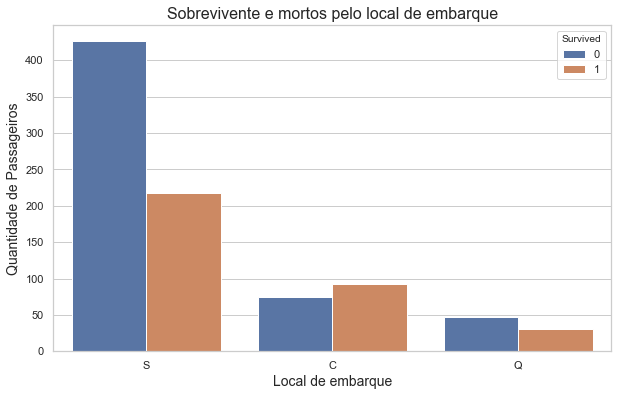

In [487]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=dfPredict3.Embarked, hue=dfPredict3.Survived, data=dfPredict3)
ax.xaxis.set_label_text("Local de embarque", fontsize=14)
ax.yaxis.set_label_text("Quantidade de Passageiros", fontsize=14)
ax.set_title("Sobrevivente e mortos pelo local de embarque", fontsize=16)
plt.show()

<p>Aparentemente, existe uma pequena relação entre os locais de embarque e o número de mortos, quem embarcou em Southampton (S) teve aproximadamente 30% de chance de sobrevivencia, enquanto quem embarcou em Cherbourg (C) teve mais chence de sobrevivência do que de morrer e quem embarcou em Queenstown (Q) teve mais chance de morrer do que de sobreviver.<p>
<p>Agora vamos treinar novamente esse dataframe com a nova coluna ver se obteremos resultados melhores.<p>

# Algoritmos para a 3ª previsão do titanic.

In [529]:
X3 = dfPredict3.drop('Survived', axis='columns')
y3 = dfPredict3.Survived
X3.head()

,Pclass,Sex,Title,AgeRange,FamilySize,FareRange,Embarked
0,3,male,Mr,20 a 30,1,Menos de 17,S
1,1,female,Mrs,30 a 40,1,45 a 85,C
2,3,female,Miss,20 a 30,0,Menos de 17,S
3,1,female,Mrs,30 a 40,1,45 a 85,S
4,3,male,Mr,30 a 40,0,Menos de 17,S


In [530]:
transCol = make_column_transformer((OneHotEncoder(), ['Pclass', 'Sex', 'Title', 'AgeRange', 'FamilySize', 'FareRange', 'Embarked']),
                                   remainder='passthrough')

## Usando Regressão Logística

In [531]:
logreg = LogisticRegression(solver='lbfgs')

In [532]:
#pipe = make_pipeline(transCol, tree)
pipe = Pipeline([
    ('trans', transCol),
    ('clf', logreg)
])

In [533]:
param_grid = {'clf__penalty': ['l1','l2'], 'clf__C': [0.001,0.01,0.1,1,10,100,1000]}

In [534]:
logreg_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

In [537]:
logreg_grid.fit(X3, y3)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('trans',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                            

In [538]:
logreg_grid.best_score_

0.828302122347066

## Usando o KNN

In [545]:
knn = KNeighborsClassifier()

In [546]:
pipe = Pipeline([
    ('trans', transCol),
    ('clf', knn)
])

In [547]:
param_grid = {'clf__n_neighbors': list(range(1,31)), 'clf__weights':['uniform', 'distance']}

In [548]:
knn_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1, n_jobs=-1)

In [549]:
knn_grid.fit(X3, y3)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    8.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('trans',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                            

In [550]:
knn_grid.best_score_

0.8238451935081148

# Usando o SVC

In [559]:
svc = SVC()

In [560]:
pipe = Pipeline([
    ('trans', transCol),
    ('clf', svc)
])

In [561]:
param_grid = {'clf__C': [0.1,10, 100, 1000,5000], 'clf__gamma': [1,0.1,0.01,0.001,0.0001], 'clf__kernel': ['rbf']}

In [562]:
svc_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1)

In [563]:
svc_grid.fit(X3, y3)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   21.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('trans',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                            

In [564]:
svc_grid.best_score_

0.8327840199750313

# Usando o Random Forest Classifier

In [565]:
rfc = RandomForestClassifier()

In [566]:
pipe = Pipeline([
    ('trans', transCol),
    ('clf', rfc)
])

In [567]:
param_grid = { 
    'clf__n_estimators': [200, 500],
    'clf__max_features': ['auto', 'sqrt', 'log2'],
    'clf__max_depth' : [4,5,6,7,8],
    'clf__criterion' :['gini', 'entropy']
}

In [568]:
rfc_grid = GridSearchCV(pipe, param_grid, cv=10, refit=True, verbose=1)

In [569]:
rfc_grid.fit(X3,y3)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  7.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('trans',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                            

In [570]:
rfc_grid.best_score_

0.8361298377028714

# Usando Árvore de Decisão

In [583]:
tree = DecisionTreeClassifier()

In [584]:
pipe = Pipeline([
    ('trans', transCol),
    ('clf', tree)
])

In [585]:
param_grid = {'clf__criterion':['gini','entropy'],'clf__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [586]:
tree_grid = GridSearchCV(pipe, param_grid, cv=20, refit=True, verbose=1)

In [587]:
tree_grid.fit(X3, y3)

Fitting 20 folds for each of 36 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   13.9s finished


GridSearchCV(cv=20, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('trans',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                            

In [588]:
tree_grid.best_score_

0.8372474747474747

# Terceira Predição para o Titanic

In [607]:
XTest3 = dfPredict.loc[:, ['Pclass', 'Sex', 'Title', 'AgeRange', 'FamilySize', 'FareRange', 'Embarked']]
XTest3.head()
XTest3.shape

(418, 7)

In [608]:
yPredict3 = tree_grid.predict(XTest3)
yPredict3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [610]:
predict3 = dfPredict.PassengerId.to_frame()

In [611]:
predict3['Survived']=yPredict3.tolist()
predict3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [612]:
predict1.to_csv(r'dataSets/predict3.csv',index=False)